# 32 - Evaluacion de Modelos de Clasificacion


* Una vez generado nuestro modelo o hipótesis, tenemos que ser capaces de ***cotejar los resultados obtenidos***.


* Para los problemas de Clasificación se utilizan (entre otros) las siguientes métricas de evaluación:

    - ***Accuracy***
    - ***Precision***
    - ***Recall***
    - ***F1***


* Para ver como clasifica el modelo generado usamos la denominada ***“Matriz de Confusión”*** en la cual se muestra el número de elementos que clasifica como verdaderos y falsos positivos y verdaderos y falsos negativos.


* Veamos a continuación los detalles de las métricas de evaluación y la matriz de confusión:


<hr>


## - Matriz de confusión

* Cuando hablamos de clasificación tenemos que medir cuanto hemos acertado y como lo hemos acertado, por ello las ***matrices de confusión nos ayudan a ver el acierto o fallo que tiene nuestro modelo a la hora de clasificar***. La matriz de confusión tiene la siguiente forma:

    - **True Positive (TP)**: Valores positivos clasificados como positivos
    - **True Negative (TN)**: Valores negativos clasificados como negativos
    - **False Positive (FP)**: Valores negativos clasificados como positivos
    - **False Negative (FN)**: Valore positivos clasificados como negativos
    
<img src="./imgs/31_01_eval.png" style="width: 400px;"/>


## - Accuracy

* Indica el porcentaje de acierto:

$$Acuracy = \frac{TP + TN}{TP + FN + FP + TN}$$

## - Precision

* Los positivos correctamente pronosticados entre todos los ejemplos pronosticados como positivos. 


* "***De lo que hemos pronosticado, cuanto hemos acertado***"


$$Precision = \frac{TP}{TP + FP}$$


<img src="./imgs/31_02_eval.png" style="width: 400px;"/>
                                                               
                                                               

## - Recall


* Los positivos correctamente pronosticados, entre todos los ejemplos que son positivos. 


* "***De lo que hay en realidad, cuanto hemos acertado***"


$$Recall = \frac{TP}{TP + FN}$$


<img src="./imgs/31_03_eval.png" style="width: 400px;"/>


## - F1 (Precision-Recall)


* Es una media que combina la precisión y el recall. 


* Si es cercano a ***1*** significa que la clasificación realizada es buena. 


* Si es cercano a ***0*** la clasificación realizada es mala.


$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$


<img src="./imgs/31_03_eval.png" style="width: 400px;"/>


## - Métricas en Sckit-Learn:

* Scikit-Learn dispone del módulo “metrics” donde tiene implementados todos estos métodos de evaluación


* Como norma general se le pasa como parámetros un array con la clasificación verdadera y otro array con la predicción:

    - **metrics.confusion_matrix(y_true, y_pred[, …])**: Compute confusion matrix to evaluate the accuracy of a classification
    - **metrics.accuracy_score(y_true, y_pred[, …])**: Accuracy classification score
    - **metrics.precision_score(y_true, y_pred[, …])**: Compute the precision
    - **metrics.recall_score(y_true, y_pred[, …])**: Compute the recall
    - **metrics.f1_score(y_true, y_pred[, labels, …])**: Compute the F1 score, also known as balanced F-score or F-measure
    - **metrics.classification_report(y_true, y_pred)**: Build a text report showing the main classification metrics



<hr>


# Ejemplo: Clasificación Binaria


* Supongamos que tenemos que clasificar 10 elementos de dos clases y la realizadad y la predicción vienen dados por:

    - y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    - y_predict = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0]


In [1]:
y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_predict = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0]

### - Matriz de confusión

* En el ejemplo tenemos:

    - 5 Elementos que son de la clase 0
    - 5 Elementos que son de la clase 0
    - True Positive (TP): De los que son de la clase 1, predigo 4 correctamente.
    - False Negative (FN): De los que son de la clase 1, predigo 1 incorrectamente.
    - True Negative (TN): De los que son de la clase 0, predigo 3 correctamente.
    - False Positive (FP): De los que son de la clase 0, predigo 2 incorrectamente.
    
    

* Podemos ver este resultado en la matriz de confusión:

In [2]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[1, 0])

array([[4, 1],
       [2, 3]])

### - Accuracy

* Basandonos en el ejemplo, calculamos el accuracy como:

$$Acuracy = \frac{TP + TN}{TP + FN + FP + TN} = \frac{4 + 3}{4 + 1 + 2 + 3} = \frac{7}{10} = 0.7$$

In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_real, y_pred=y_predict)

0.7

### - Precision

* Basandonos en el ejemplo, calculamos la precision como:

$$Precision = \frac{TP}{TP + FP} = \frac{4}{4 + 2} = \frac{4}{6} = 0.67$$

In [4]:
from sklearn.metrics import precision_score

precision_score(y_true=y_real, y_pred=y_predict)

0.6666666666666666

### - Recall

* Basandonos en el ejemplo, calculamos el recall como:

$$Recall = \frac{TP}{TP + FN} = \frac{4}{4 + 1} = \frac{4}{5} = 0.8$$

In [5]:
from sklearn.metrics import recall_score

recall_score(y_true=y_real, y_pred=y_predict)

0.8

### - F1

* Basandonos en el ejemplo, calculamos el F1 como:

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2 \cdot \frac{0.67 \cdot 0.8}{0.67 + 0.8} = 2 \cdot \frac{0.54}{1.47} = 0.73$$

In [6]:
from sklearn.metrics import f1_score

f1_score(y_true=y_real, y_pred=y_predict)

0.7272727272727272

* Para representar de una forma visual más agradable y legible la matriz de confusión, podemos usar el siguiente código que tiene la función "plot_confusion_matrix()"

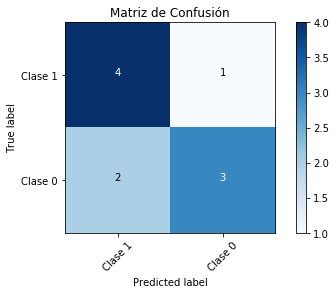

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
matriz_confusion = confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[1, 0])
plot_confusion_matrix(matriz_confusion, classes=['Clase 1', 'Clase 0'], title='Matriz de Confusión')
plt.show()

<hr>


# Ejemplo: Clasificación Múltiple


* Para el caso de la clasificación múltiple las métricas son las mismas, pero el procedimiento para calcularlo es diferente.


* Todas estas métricas se calculan para cada clase, considerando una "Clase A" como la clase a clasificar correctamente y el resto de clases se consideran como una sola clase.


* Veamos el siguiente ejemplo en el que tenemos:

    - y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]
    - y_predict = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2]
    
    
* Tendríamos que calcular las metricas para las clases 0, 1 y 2 considerando:
<span></span><br><br>
    - ***Clase 0***: Consideramos la Clase 0 como la que es y el resto de clases como una misma Clase X
        + y_real =    [X, X, X, X, X, 0, 0, 0, 0, 0, X, X, X, X, X]
        + y_predict = [X, X, 0, X, X, 0, 0, X, X, 0, X, X, X, 0, X]
<span></span><br><br>        
    - ***Clase 1***: Consideramos la Clase 1 como la que es y el resto de clases como una misma Clase X
        + y_real =    [1, 1, 1, 1, 1, X, X, X, X, X, X, X, X, X, X]
        + y_predict = [1, 1, X, 1, 1, X, X, 1, 1, X, X, 1, 1, X, X]
<span></span><br><br>        
    - ***Clase 2***: Consideramos la Clase 2 como la que es y el resto de clases como una misma Clase X
        + y_real =    [X, X, X, X, X, X, X, X, X, X, 2, 2, 2, 2, 2]
        + y_predict = [X, X, X, X, X, X, X, X, X, X, 2, X, X, X, 2]


* Veamos a continuación un ejemplo, en el que usaremos la función "classification_report()" que nos devolverá las métricas vistas anteriormente por clase:

In [8]:
y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]
y_predict = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2]

from sklearn.metrics import classification_report

print(classification_report(y_true=y_real, y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       1.00      0.40      0.57         5

   micro avg       0.60      0.60      0.60        15
   macro avg       0.70      0.60      0.60        15
weighted avg       0.70      0.60      0.60        15



* Veamos a continuación la matriz de confusión:

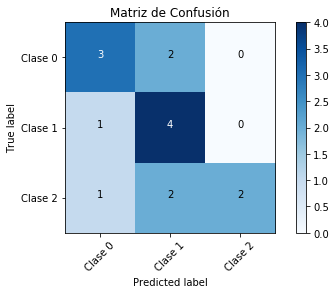

In [9]:
plt.figure()
matriz_confusion = confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[0, 1, 2])
plot_confusion_matrix(matriz_confusion, classes=['Clase 0', 'Clase 1', 'Clase 2'], title='Matriz de Confusión')
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">